# Logistic Regression Algorithm

### Importing the libraries

In [1]:
import numpy as np

In [2]:
w = np.array([[1,1,1,1],[1,0,1,0],[0,2,1,1]])
W = np.array([1,0,0])

In [3]:
x = np.random.randn(100,3)
x.T.shape

(3, 100)

In [4]:
np.dot(W,x.T).shape

(100,)

### Importing the dataset

In [5]:
from sklearn import datasets

In [25]:
data = datasets.load_breast_cancer()
X = data['data']
y = data['target']

In [26]:
X.shape

(569, 30)

In [28]:
y.shape

(569,)

### Splitting the dataset into the Training set and Test set

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Creating the architecture of Linear Regression

In [40]:
class LogisticRegression:
    def __init__(self, lr=0.001, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.W = None
        self.b = None

    def fit(self, X, y):
        N, m = X.shape
        self.W = np.zeros(m)
        self.b = 0

        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.W) + self.b
            y_pred = self._sigmiod(linear_model)
            
            self.W += (self.lr/N)*np.dot(X.T, (y - y_pred))
            self.b += (self.lr/N)*np.sum(y - y_pred)
        
    def predict(self, X):
        linear_model = np.dot(X, self.W) + self.b
        y_hat = self._sigmiod(linear_model)
        classes = [1 if y>0.5 else 0 for y in y_hat]
        return np.array(classes)
    
    def _sigmiod(self, x):
        return 1/(1 + np.exp(-x))

## Visualizing the data

In [35]:
import matplotlib.pyplot as plt

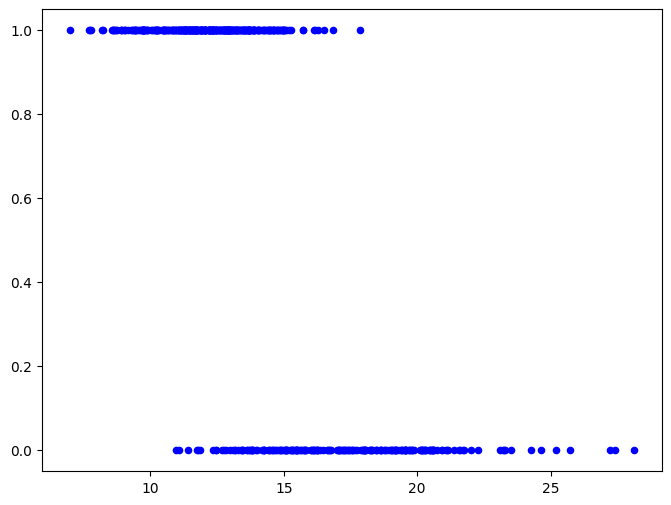

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='b', marker='o', s=20)
plt.show()

### Training the Regression

In [55]:
regressor = LogisticRegression(lr=0.1,n_iter=1000)
regressor.fit(X_train,y_train)

/var/folders/br/pq4r4jdj7n370js8hxvml1vm0000gn/T/ipykernel_1605/2650448664.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


### Predicting the Test set results

In [56]:
y_pred = regressor.predict(X_test)

/var/folders/br/pq4r4jdj7n370js8hxvml1vm0000gn/T/ipykernel_1605/2650448664.py:27: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


### Calculating the Accuracy

In [57]:
def accuracy(y, y_hat):
    return np.sum(y==y_hat)/len(y)

In [58]:
print('Accuracy: ', accuracy(y_test, y_pred))

Accuracy:  0.9210526315789473


### Calucating Accuracy

In [59]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [60]:
accu = r2_score(y_test, y_pred)
print("Accuracy:", accu)

Accuracy: 0.6957902001380272
